In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Daten Bezug

In [3]:
# url = "https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd_2020/download/Fahrzeiten_SOLL_IST_20201227_20210102.csv"

# df = read_csv(url)

Rows: 1330771 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): betriebsdatum, halt_kurz_von1, datum_von, halt_kurz_nach1, datum_n...
dbl (28): linie, richtung, fahrzeug, kurs, seq_von, halt_diva_von, halt_punk...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Daten auswertung

In [66]:
read_and_reshape_data <- function(path){
    # daten einlesen
    data = read_csv(path)
    
    # Daten formatieren: betriebsdatum in Date umwandeln, soll_an_von in hms umwandeln
    data_ready <- 
    data %>%
        mutate(
            # change to date format
            betriebsdatum = dmy(betriebsdatum),
            # change to hms format
            soll_an_von = case_when(
                soll_an_von < 86400 ~ hms::as_hms(soll_an_von),
                soll_an_von >= 86400 ~ hms::as_hms(soll_an_von - 86400)
            ),
            # stunde extrahieren
            hour = hour(soll_an_von),
            # tramtyp_id erstellen
            tramtyp_id = case_when(
                (fahrzeug >= 1601) & (fahrzeug <= 1690) ~ 1,
                (fahrzeug >= 2001) & (fahrzeug <= 2435) ~ 2,
                (fahrzeug >= 3001) & (fahrzeug <= 3088) ~ 3,
                (fahrzeug >= 4001) & (fahrzeug <= 4070) ~ 4,
            ),
            # tramtyp_id in factor umwandeln
            tramtyp_id = as.factor(tramtyp_id)
        )
    # drop na values in tramtyp_id
    data_ready <- data_ready %>% drop_na(tramtyp_id)
    return(data_ready)
}

read_and_reshape_data("/Users/JonasIseli/Library/CloudStorage/OneDrive-ZHAW/02_ZHAW/05_HS24/03.1_Datenanalyse/03_Projekt/03_Arbeit/DaAn_Projektarbeit/testdata.csv")

Rows: 631428 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): betriebsdatum
dbl (5): linie, fahrzeug, soll_an_von, verspaetung, halt_id_von

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


linie,betriebsdatum,fahrzeug,soll_an_von,verspaetung,halt_id_von,hour,tramtyp_id
<dbl>,<date>,<dbl>,<time>,<dbl>,<dbl>,<int>,<fct>
3,2016-01-07,3024,16:09:12,-3,2640,16,3
2,2016-01-07,2059,16:32:12,26,2253,16,2
2,2016-01-07,2070,05:57:54,25,2245,5,2
2,2016-01-07,3032,17:48:18,-48,1306,17,3
4,2016-01-07,3056,16:10:54,-23,1542,16,3
17,2016-01-09,3031,00:38:48,102,2705,0,3
17,2016-01-09,3005,15:51:24,-24,1574,15,3
17,2016-01-09,3005,23:00:36,8,2538,23,3
2,2016-01-06,2067,00:25:00,-8,2788,0,2


In [61]:
# exclude extreme delay values
exclude_extreme_delay_values <- function(delay_threshold,data){
    data_greater_positive_threshold <- 
        data %>%
        filter(verspaetung > delay_threshold) %>%
        count(tramtyp_id)

    print(paste0("For the following tramtyp_id, n values were excluded because the delay was greater than ",delay_threshold," seconds:"))
    print(data_greater_positive_threshold)

    data_smaller_negative_threshold <- 
        data %>%
        filter(verspaetung < -delay_threshold) %>%
        count(tramtyp_id)
    
    print(paste0("For the following tramtyp_id, n values were excluded because the delay was smaller than -",delay_threshold," seconds:"))
    print(data_smaller_negative_threshold)

    data_filtered <- 
        data %>%
        filter(verspaetung < delay_threshold, verspaetung > -delay_threshold)

    return(data_filtered)
}


delay_threshold_seconds <- 900

# count data where verspaetung > 1800
data_summary_greater_1800 <- 
    data_ready %>%
    filter(verspaetung > delay_threshold_seconds) %>%
    count(tramtyp_id)

print(paste0("For the following tramtyp_id, n values were excluded because the delay was greater than ",delay_threshold_seconds," seconds:"))
print(data_summary_greater_1800)

# count data where verspaetung < -1800
data_summary_smaller_minus_1800 <- 
    data_ready %>%
    filter(verspaetung < -delay_threshold_seconds) %>%
    count(tramtyp_id)

print(paste0("For the following tramtyp_id, n values were excluded because the delay was smaller than -",delay_threshold_seconds," seconds:"))
print(data_summary_smaller_minus_1800)

# filter data where verspaetung > 1800 or verspaetung < -1800

data_ready_filtered <- 
    data_ready %>%
    filter(verspaetung < delay_threshold_seconds, verspaetung > -delay_threshold_seconds)

# count data for each tramtyp_id
data_summary_tramtyp <- 
data_ready_filtered %>%
    count(tramtyp_id)

print("For the following tramtyp_id, the number of data points is:")
print(data_summary_tramtyp)



[1] "For the following tramtyp_id, n values were excluded because the delay was greater than 900 seconds:"
# A tibble: 2 × 2
  tramtyp_id     n
  <fct>      <int>
1 2             43
2 3             65
[1] "For the following tramtyp_id, n values were excluded because the delay was smaller than -900 seconds:"
# A tibble: 2 × 2
  tramtyp_id     n
  <fct>      <int>
1 2              5
2 3              2
[1] "For the following tramtyp_id, the number of data points is:"
# A tibble: 2 × 2
  tramtyp_id      n
  <fct>       <int>
1 2          317164
2 3          314149


In [33]:
min(data_final$verspaetung)
max(data_final$verspaetung)


[1] -14110

[1] 6553

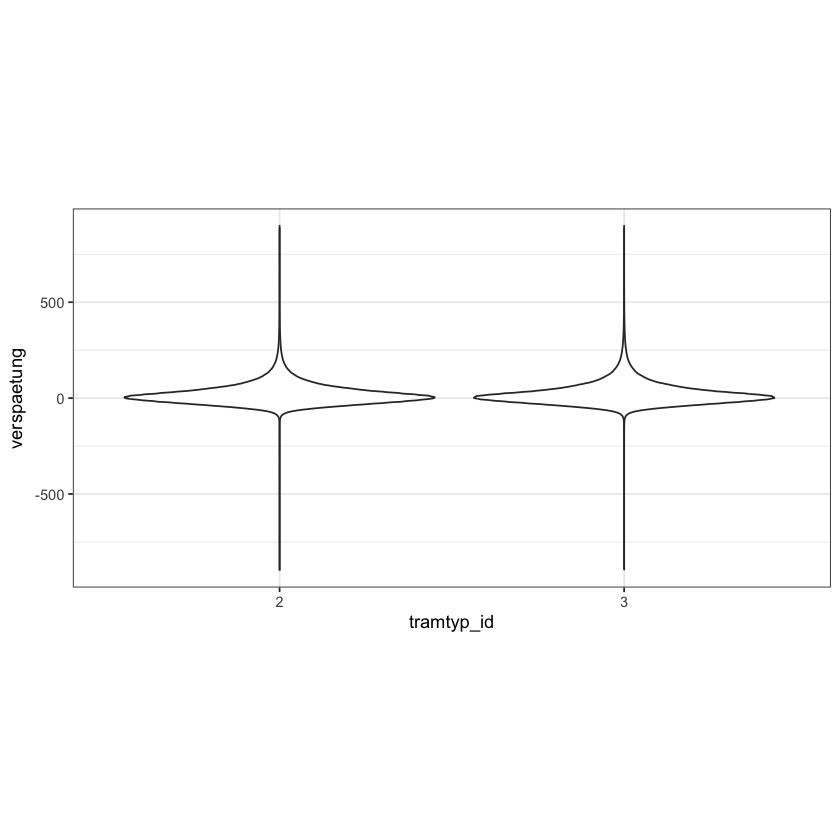

In [71]:
## Auswertung für Tramtyp

data_2016_filtered %>%
    ggplot(
        aes(
            x = tramtyp_id,
            y = verspaetung
        )

    )+

    geom_violin()+

    theme_bw()+

    theme(
        aspect.ratio = 0.5
    )

In [ ]:
## check variance homogeneity with bartlett test
alpha = 0.05
bartlett_test <- bartlett.test(verspaetung ~ tramtyp_id, data = data_ready_filtered)
bartlett.test(verspaetung ~ tramtyp_id, data = data_ready_filtered)$p.value


[1] 1.474852e-08

In [54]:
oneway.test(verspaetung ~ tramtyp_id, data = data_ready_filtered)
data_ready_filtered %>%
    group_by(tramtyp_id) %>%
    summarise(
        mean = mean(verspaetung),
        sd = sd(verspaetung),
        n = n()
    )


	One-way analysis of means (not assuming equal variances)

data:  verspaetung and tramtyp_id
F = 315.66, num df = 1, denom df = 631311, p-value < 2.2e-16


tramtyp_id,mean,sd,n
<fct>,<dbl>,<dbl>,<int>
2,25.11529,62.92542,317164
3,22.31526,62.29417,314149


In [67]:
# path to desktop
path = "/Users/JonasIseli/Desktop/2016_aggregated.csv"
data_2016_agg <- read_and_reshape_data(path = path)

Rows: 32330887 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): betriebsdatum
dbl (5): linie, fahrzeug, soll_an_von, verspaetung, halt_id_von

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
data_2016_filtered <- exclude_extreme_delay_values(delay_threshold = 900, data = data_2016_agg)

[1] "For the following tramtyp_id, n values were excluded because the delay was greater than 900 seconds:"
# A tibble: 2 × 2
  tramtyp_id     n
  <fct>      <int>
1 2           2898
2 3           2788
[1] "For the following tramtyp_id, n values were excluded because the delay was smaller than -900 seconds:"
# A tibble: 2 × 2
  tramtyp_id     n
  <fct>      <int>
1 2            511
2 3            448


In [70]:
data_2016_filtered

linie,betriebsdatum,fahrzeug,soll_an_von,verspaetung,halt_id_von,hour,tramtyp_id
<dbl>,<date>,<dbl>,<time>,<dbl>,<dbl>,<int>,<fct>
2,2016-05-15,3007,04:56:30,45,1306,4,3
2,2016-05-15,3007,05:03:00,0,2228,5,3
2,2016-05-15,3007,05:02:00,4,1528,5,3
2,2016-05-15,3007,05:00:36,-22,2657,5,3
2,2016-05-15,3007,04:57:48,40,1502,4,3
2,2016-05-15,2076,05:07:12,8,2818,5,2
2,2016-05-15,2076,05:06:30,-3,1310,5,2
2,2016-05-15,3007,05:07:48,-40,2104,5,3
2,2016-05-15,3007,05:06:06,-27,1565,5,3
